In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
df_train= pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [102]:
print(df_train.shape)
print(df_test.shape)

(614, 13)
(367, 12)


In [103]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [104]:
#checking for missing values
total = df_train.isnull().sum().sort_values(ascending=False)
percent= (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis =1 , keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


we can see that top 7 variables has missing values


In [105]:
#filling missing values
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].dropna().mode().values[0])
df_train['Married'] =df_train['Married'].fillna(df_train['Married'].dropna().mode().values[0])
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].dropna().mode().values[0])
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].dropna().mode().values[0])
df_train['LoanAmount']= df_train['LoanAmount'].fillna(df_train['LoanAmount'].dropna().median())
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].dropna().mode().values[0])
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].dropna().mode().values[0] )


In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


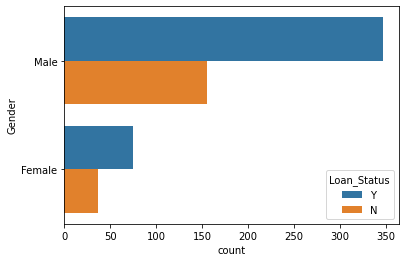

In [107]:
#now for some EDA
sns.countplot(y= 'Gender', hue = 'Loan_Status', data = df_train)

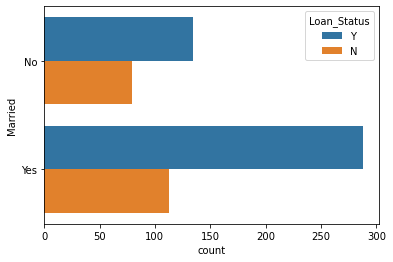

In [108]:
sns.countplot( y= 'Married', hue = 'Loan_Status', data =df_train)

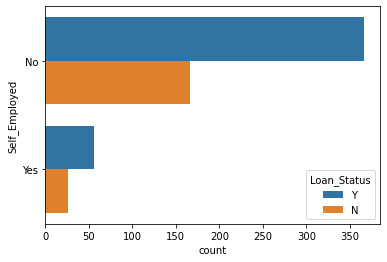

In [109]:
sns.countplot(y = 'Self_Employed', hue = 'Loan_Status', data= df_train)

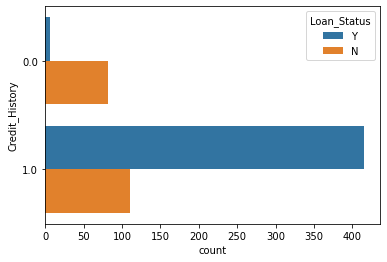

In [110]:
sns.countplot(y = 'Credit_History', hue= 'Loan_Status', data = df_train)

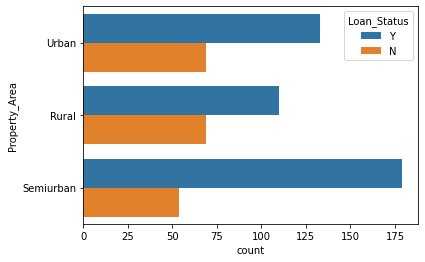

In [111]:
sns.countplot( y= 'Property_Area', hue = 'Loan_Status', data = df_train)

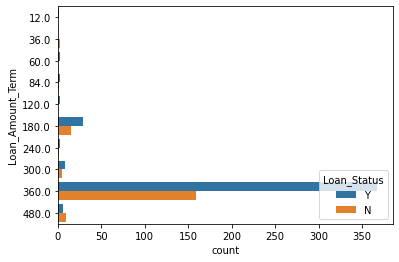

In [112]:
sns.countplot(y = 'Loan_Amount_Term', hue = 'Loan_Status', data = df_train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


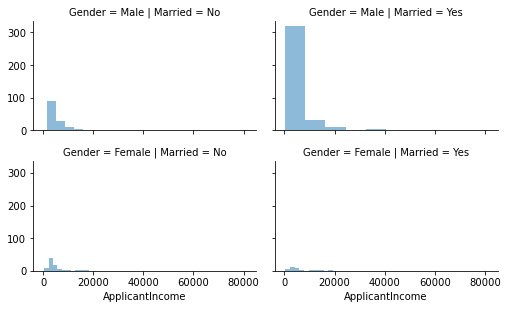

In [113]:
grid = sns.FacetGrid(df_train, row='Gender', col='Married', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


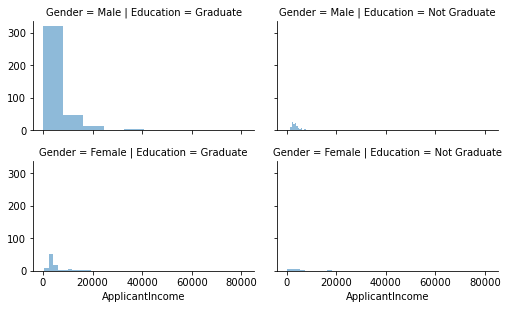

In [114]:
grid = sns.FacetGrid(df_train, row='Gender', col='Education', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


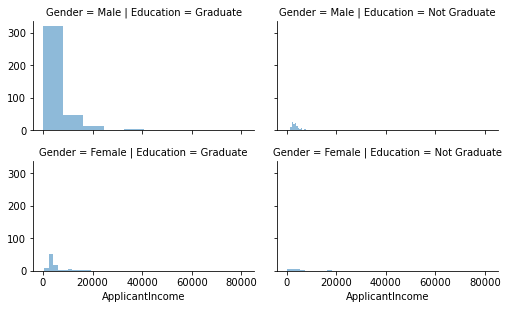

In [115]:
grid = sns.FacetGrid(df_train, row='Gender', col='Education', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


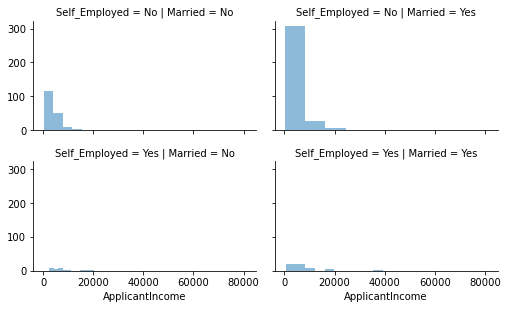

In [116]:
grid = sns.FacetGrid(df_train, row='Self_Employed', col='Married', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


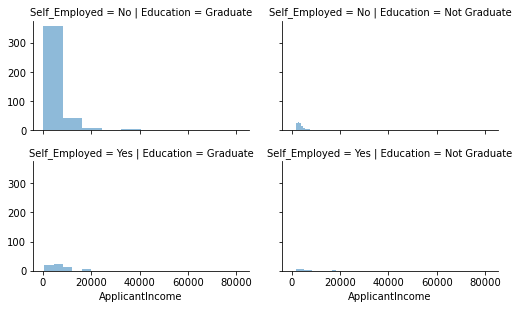

In [117]:
grid = sns.FacetGrid(df_train, row='Self_Employed', col='Education', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


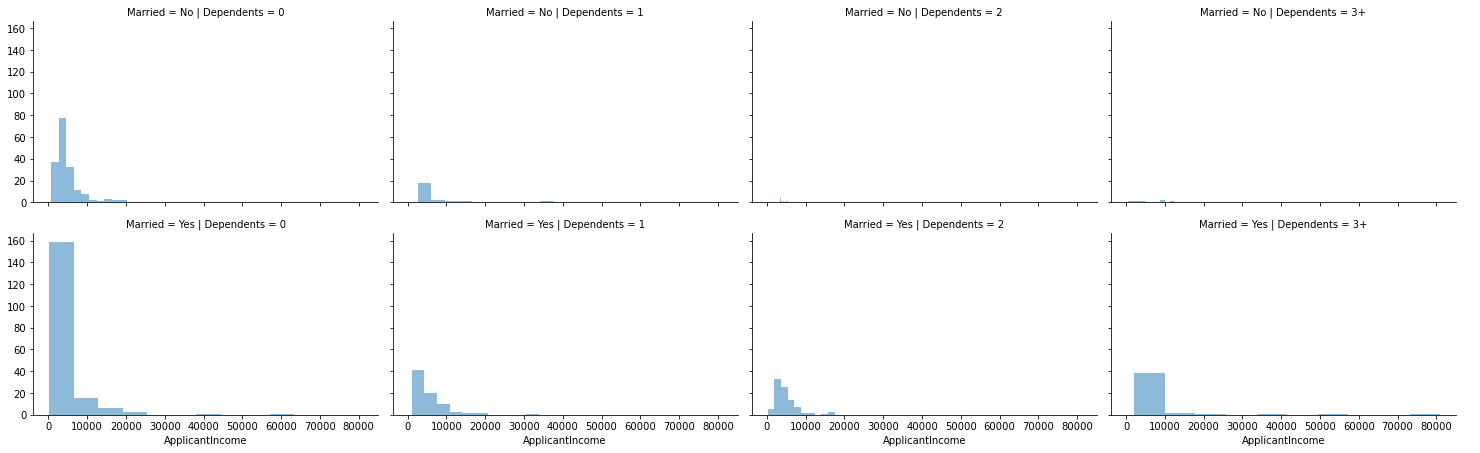

In [118]:
grid = sns.FacetGrid(df_train, row='Married', col='Dependents', size = 3.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


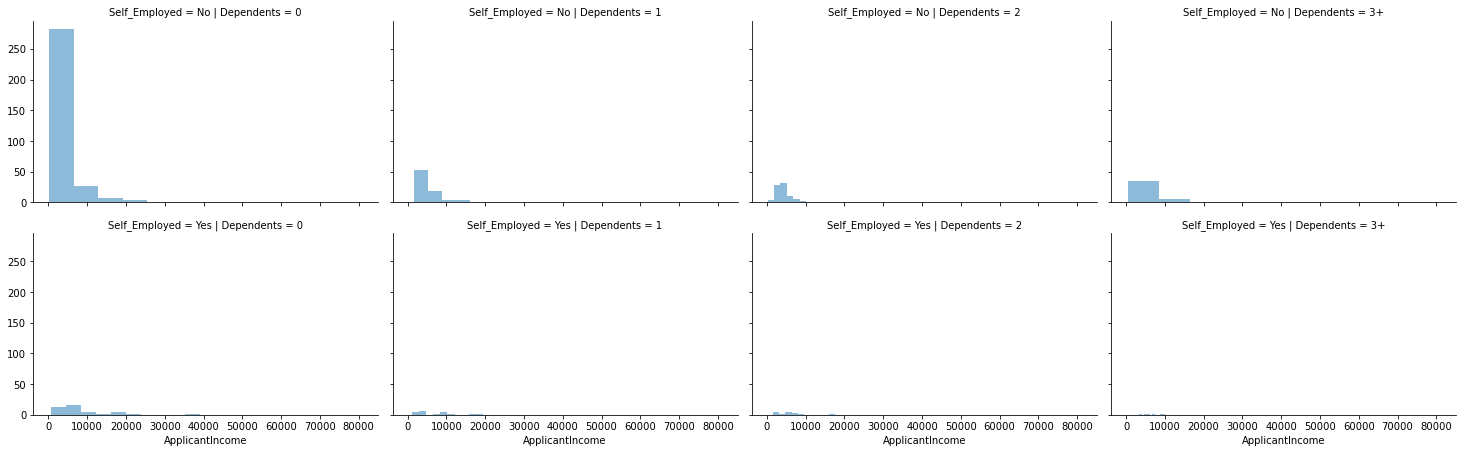

In [119]:
grid = sns.FacetGrid(df_train, row='Self_Employed', col='Dependents', size = 3.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


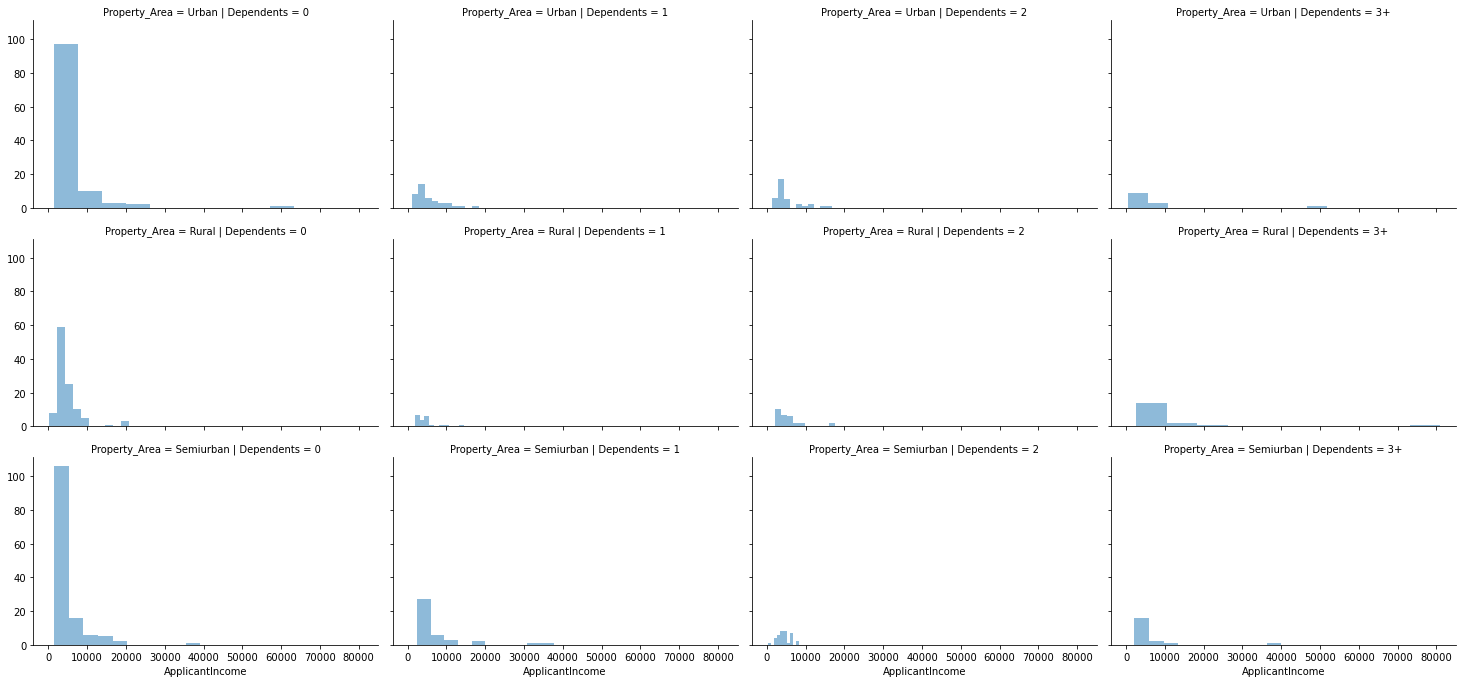

In [120]:
grid = sns.FacetGrid(df_train, row='Property_Area', col='Dependents', size = 3.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = .5, bins = 10)
grid.add_legend()

Encoding the data  -> for trainig

In [122]:
code_num = {'Male':1, 'Female':2,
           'Yes':1,'No':2,
           "Graduate":1, 'Not Graduate':2,
           'Urban':3, 'Semiurban':2,'Rural':1,
           'Y':1, 'N':0,
           '3+':3}


In [123]:
df_train = df_train.applymap(lambda s: code_num.get(s) if s in code_num else s)
df_test = df_test.applymap(lambda s: code_num.get(s) if s in code_num else s)
#dropping uniqe  loan id
df_train.drop('Loan_ID', axis=1 , inplace = True)


In [124]:
#convertinf Dependents to numeric
Dependents_=pd.to_numeric(df_train.Dependents)
Dependents__= pd.to_numeric(df_test.Dependents)

df_train.drop(['Dependents'], axis = 1, inplace=True)
df_test.drop(['Dependents'], axis = 1, inplace = True)


df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test= pd.concat([df_test, Dependents__], axis =1)

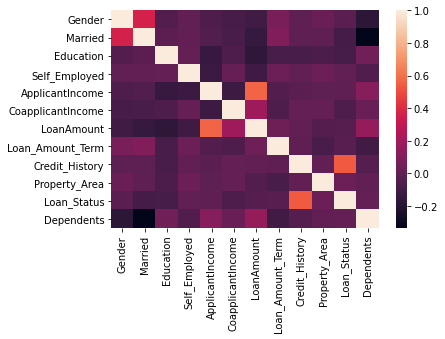

In [125]:
sns.heatmap(df_train.corr())

we can see that no correlations are too high 

In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [127]:
#Seprating target and feature
y= df_train['Loan_Status']
X= df_train.drop('Loan_Status', axis = 1)

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import  GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.20, 
                                                    random_state= 0)

In [130]:
#logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
print(evaluation)

0.8979591836734695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
#Decision Trees 
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_predtre = tree.predict(X_test)
print(f1_score(y_test, y_predtre))

0.7861271676300577


In [132]:
#random forest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
ypred_for = forest.predict(X_test)
print(f1_score(y_test, ypred_for))

0.8645833333333334


note f1 score  is a measure of tests score accuracy